# Load Libraries

In [1]:
import polars as pl
import glob, os
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from pathlib import Path
from string_gsea.network import separate_pivot_longer
from IPython.display import display
from string_gsea.network import summarize_terms
from string_gsea.network import make_network
from string_gsea.network import make_network_with_colors, plot_network_graph
from string_gsea.network import interactive_cytoscape

In [2]:
wd = %pwd
print(Path(wd))

/Users/witoldwolski/__checkout/stringdbpy/docs


# Data Preparation

In [3]:
# Define input directory and file


file = Path(wd).parent/"tests/data/dummy_out/WU_abcd_GSEA/from_rnk/"/"WUabcd_string_gsea_results_long.xlsx"
file.exists()

# Read Excel and convert to Polars
# Read Excel file directly with polars
df = pl.read_excel(file)
# Select and explode protein columns
df = df.with_columns(
    (pl.col("genesMapped") / pl.col("genesInSet")).alias("geneRatio")
)
df.columns


['contrast',
 'category',
 'termID',
 'termDescription',
 'genesMapped',
 'genesInSet',
 'enrichmentScore',
 'direction',
 'falseDiscoveryRate',
 'method',
 'proteinIDs',
 'proteinLabels',
 'proteinInputLabels',
 'proteinInputValues',
 'proteinRanks',
 'directionNR',
 'num_contrasts',
 'geneRatio']

In [4]:

xd = separate_pivot_longer(df)
xd = summarize_terms(xd)


In [5]:

# Display the first 10 rows of your Polars DataFrame 'xd' in the notebook
#display(xd.head(100))
# pull line direction and show unique values
#display(xd.col("direction").unique())
# pull line direction and show unique values 
display(xd.get_column("direction").unique())


direction
str
"""bottom"""
"""top"""
"""both ends"""


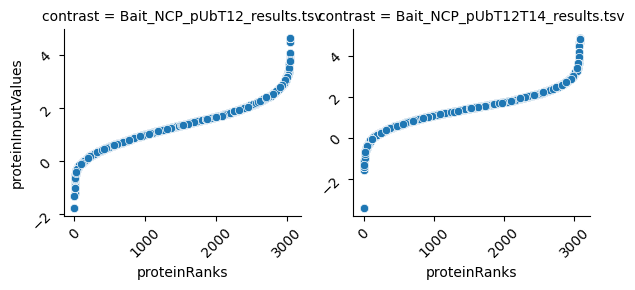

In [6]:
import seaborn as sns

#pdf = xd.select(['contrast','proteinRanks','proteinInputValues']).to_pandas()

g = sns.FacetGrid(xd, col='contrast', col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='proteinRanks', y='proteinInputValues')
g.set_axis_labels('proteinRanks', 'proteinInputValues')
for ax in g.axes.flatten():
    ax.tick_params(labelrotation=45)

plt.tight_layout()
plt.show()


# Results { .tab-set }

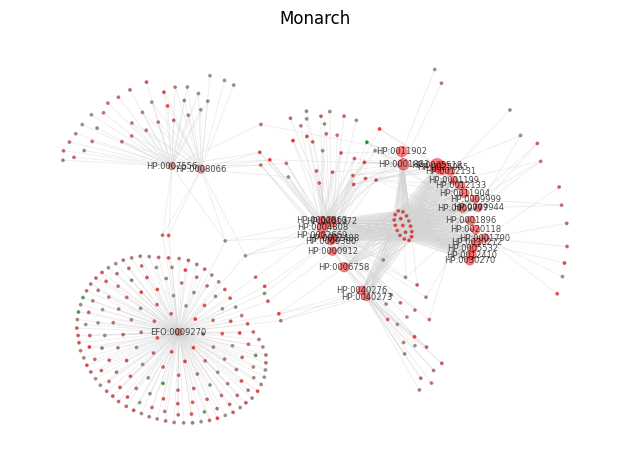

In [14]:
# Loop through contrasts and categories
if False:
    for cont in contrast_list:
        display(Markdown(f"## Results {cont}"))
        for cat in categ:
            display(Markdown(f"### {cat}"))
            xdf = xd.filter((pl.col("contrast")==cont) & (pl.col("category")==cat))
            
            G = make_network(xdf)
            G = color_network(G)   
            plot_graph(G, cat)
            #net = plot_graph_interactive(G, cat)
            #net.show(f"network_{cont}_{cat}.html")



cont = "Bait_NCP_pUbT12T14_results.tsv"
cat = "Monarch"
xdf = xd.filter((pl.col("contrast")==cont) & (pl.col("category")==cat))
        
G = make_network_with_colors(xdf)
plot_network_graph(G, cat)


In [16]:

# --- usage in your notebook ---
widget = interactive_cytoscape(G)
widget


CytoscapeWidget(cytoscape_layout={'name': 'cose'}, cytoscape_style=[{'selector': 'node', 'style': {'width': 'd…